# InsideSherpa-Quantium-Data Analytics-Task 2- Experimentation and uplift testing

In [1]:
# Necessary Data Science Libraries
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Dates
import matplotlib.dates as mdates



In [2]:
# import data
data=pd.read_csv('https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_data.csv')

In [3]:
#show first five data
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
# shape of dataframe, show (row, column)
data.shape

(264834, 12)

In [5]:
#Check the missing value
data.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Select control stores

The client has selected stores 77, 86 and 88 as trial stores and want to control stores to be established stores to prior to trial period.

We would want to match trial stores to control stores are similar to the trial store prior to the trail period of Feb 2019 in terms of.

<ul>
    <li>Monthly Total sales revenue</li>
    <li>Monthly Total number of customers</li>
    <li>Monthly Average number of transactions per customer</li>
</ul>

Create the matrics of interest and filter out stores that are present throughout the pre-trial period.



Examining the performance in trial vs control stores to provide a recommendation for each location based on our insight.

In [6]:
#create "YEARMONTH" feature
data['YEARMONTH']= [''.join(x.split('-')[0:2])for x in data.DATE]
data['YEARMONTH']=pd.to_numeric(data['YEARMONTH'])
data['YEARMONTH'].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int64

In [7]:
#Check to see if 'YEARMONTH' is in 'int'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
LYLTY_CARD_NBR      264834 non-null int64
DATE                264834 non-null object
STORE_NBR           264834 non-null int64
TXN_ID              264834 non-null int64
PROD_NBR            264834 non-null int64
PROD_NAME           264834 non-null object
PROD_QTY            264834 non-null int64
TOT_SALES           264834 non-null float64
PACK_SIZE           264834 non-null int64
BRAND               264834 non-null object
LIFESTAGE           264834 non-null object
PREMIUM_CUSTOMER    264834 non-null object
YEARMONTH           264834 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 26.3+ MB


Creat five metrics to use for each month and stores.
<ol>
<li>Total sales</li>
<li>Number of customers</li>
<li>Transaction per customer</li>
<li>Chips per transaction</li>
<li>Average price per unit</li>
</ol>

Creat individual dataframe and then concatenate all of them together at the end.

In [8]:
#Monthly store total sales
#Sum up total sales

Totsales = data.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()
Totsales

STORE_NBR  YEARMONTH
1          201807        206.90
           201808        176.10
           201809        278.80
           201810        188.10
           201811        192.60
           201812        189.60
           201901        154.80
           201902        225.40
           201903        192.90
           201904        192.90
           201905        221.40
           201906        174.10
2          201807        150.80
           201808        193.80
           201809        154.40
           201810        167.80
           201811        162.90
           201812        136.00
           201901        162.80
           201902        139.40
           201903        192.10
           201904        196.50
           201905        192.70
           201906        156.60
3          201807       1205.70
           201808       1079.75
           201809       1021.50
           201810       1037.90
           201811       1008.00
           201812       1121.60
                   

In [9]:
#Monthly store number of customers
#Count the unique loyalty card number for each store in each month
Ncustomers=data.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
Ncustomers

STORE_NBR  YEARMONTH
1          201807        49
           201808        42
           201809        59
           201810        44
           201811        46
           201812        42
           201901        35
           201902        52
           201903        45
           201904        42
           201905        46
           201906        42
2          201807        39
           201808        39
           201809        36
           201810        41
           201811        39
           201812        35
           201901        43
           201902        29
           201903        43
           201904        47
           201905        48
           201906        40
3          201807       112
           201808       112
           201809       102
           201810       104
           201811       101
           201812       111
                       ... 
270        201901       117
           201902        94
           201903       104
           201904       100

In [10]:
#Monthly store number of transactions per customer
#Divided unique transaction ID by unique loyalty card number
NTXNpercust=data.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()/data.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
NTXNpercust

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
           201812       1.119048
           201901       1.028571
           201902       1.057692
           201903       1.088889
           201904       1.023810
           201905       1.108696
           201906       1.000000
2          201807       1.051282
           201808       1.102564
           201809       1.027778
           201810       1.048780
           201811       1.025641
           201812       1.057143
           201901       1.046512
           201902       1.103448
           201903       1.069767
           201904       1.042553
           201905       1.041667
           201906       1.050000
3          201807       1.232143
           201808       1.169643
           201809       1.166667
           201810       1.144231
           201811       1.168317
           201812     

In [11]:
#Monthly store number of chips per transaction
#Sum up product quantity and divided
NchipsperTXN=data.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum()/data.groupby(['STORE_NBR','YEARMONTH']).TXN_ID.nunique()
NchipsperTXN

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
           201812       1.212766
           201901       1.166667
           201902       1.181818
           201903       1.183673
           201904       1.325581
           201905       1.294118
           201906       1.261905
2          201807       1.121951
           201808       1.279070
           201809       1.108108
           201810       1.046512
           201811       1.100000
           201812       1.081081
           201901       1.088889
           201902       1.156250
           201903       1.108696
           201904       1.142857
           201905       1.120000
           201906       1.047619
3          201807       1.963768
           201808       1.931298
           201809       1.949580
           201810       1.974790
           201811       1.923729
           201812     

In [12]:
#Monthly store average price per unit
#Sum up total sales and divide that by sum of product quantity
Avgpriceperunit=data.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()/data.groupby(['STORE_NBR','YEARMONTH']).PROD_QTY.sum()
Avgpriceperunit

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
           201812       3.326316
           201901       3.685714
           201902       3.467692
           201903       3.325862
           201904       3.384211
           201905       3.354545
           201906       3.284906
2          201807       3.278261
           201808       3.523636
           201809       3.765854
           201810       3.728889
           201811       3.702273
           201812       3.400000
           201901       3.322449
           201902       3.767568
           201903       3.766667
           201904       3.508929
           201905       3.441071
           201906       3.559091
3          201807       4.449077
           201808       4.267787
           201809       4.403017
           201810       4.416596
           201811       4.440529
           201812     

In [13]:
#Concatenate into a new dataframe called 'Measureovertime'
df=[Totsales,Ncustomers,NTXNpercust,NchipsperTXN,Avgpriceperunit]
Measureovertime=pd.concat(df,join='outer',axis=1) #
Measureovertime.head()

TOT_SALES  LYLTY_CARD_NBR         0         1         2
STORE_NBR YEARMONTH                                                         
1         201807         206.9              49  1.061224  1.192308  3.337097
          201808         176.1              42  1.023810  1.255814  3.261111
          201809         278.8              59  1.050847  1.209677  3.717333
          201810         188.1              44  1.022727  1.288889  3.243103
          201811         192.6              46  1.021739  1.212766  3.378947

In [14]:
#rename the columns
Measureovertime=Measureovertime.rename(columns = {'TOT_SALES':'Totsales', 'LYLTY_CARD_NBR':'Ncustomers', 0:'NTXNpercust', 1:'NchipsperTXN', 2:'AvgpricePerunit'})
Measureovertime.head()

Totsales  Ncustomers  NTXNpercust  NchipsperTXN  \
STORE_NBR YEARMONTH                                                    
1         201807        206.9          49     1.061224      1.192308   
          201808        176.1          42     1.023810      1.255814   
          201809        278.8          59     1.050847      1.209677   
          201810        188.1          44     1.022727      1.288889   
          201811        192.6          46     1.021739      1.212766   

                     AvgpricePerunit  
STORE_NBR YEARMONTH                   
1         201807            3.337097  
          201808            3.261111  
          201809            3.717333  
          201810            3.243103  
          201811            3.378947

In [15]:
#Which store do not have full observation, i.e. have months where there is no transaction for chips
a=pd.pivot_table(data, index='STORE_NBR', columns='YEARMONTH', values='TXN_ID', aggfunc='count') #
a

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
6,51.0,47.0,38.0,54.0,51.0,41.0,37.0,40.0,40.0,38.0,53.0,40.0
7,120.0,131.0,128.0,124.0,129.0,114.0,115.0,121.0,139.0,109.0,123.0,129.0
8,43.0,46.0,36.0,49.0,40.0,40.0,50.0,38.0,52.0,41.0,47.0,38.0
9,50.0,56.0,59.0,57.0,65.0,61.0,66.0,45.0,54.0,46.0,55.0,45.0


In [16]:
#Check the missing value
a.isnull().sum()

YEARMONTH
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

In [17]:
#store numbers that do not have full observation periods
null_store = a[a.isnull().any(axis=1)].index.tolist()
null_store

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [18]:
len(null_store)

12

There are 12 stores with incomplete observation period

In [19]:
# show the first five dataframe
Measureovertime.head()

Totsales  Ncustomers  NTXNpercust  NchipsperTXN  \
STORE_NBR YEARMONTH                                                    
1         201807        206.9          49     1.061224      1.192308   
          201808        176.1          42     1.023810      1.255814   
          201809        278.8          59     1.050847      1.209677   
          201810        188.1          44     1.022727      1.288889   
          201811        192.6          46     1.021739      1.212766   

                     AvgpricePerunit  
STORE_NBR YEARMONTH                   
1         201807            3.337097  
          201808            3.261111  
          201809            3.717333  
          201810            3.243103  
          201811            3.378947

In [20]:
len(Measureovertime)

3169

In [21]:
Measureovertime.reset_index(inplace=True)
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [22]:
#Drop 'null_store' from 'Measureovertime' dataframe
Measureovertime=Measureovertime[~Measureovertime['STORE_NBR'].isin(null_store)] #
len(Measureovertime)

3120

In [23]:
#Create new dataframe 'Pretrailmeasures'
#Filter to pre-trail period, for example: 201902
Pretrialmeasures=Measureovertime.loc[Measureovertime['YEARMONTH'] < 201902,:] #loc index
len(Pretrialmeasures)

1820

In [24]:
# show the first five data
Pretrialmeasures.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [25]:
#Create a function which calculates the correlation between trial store and other stores
def CalculateCorrelation(inputTable, metric, trial_store):
    output=pd.DataFrame({'Store1':[],'Store2':[],'Correlation':[]})
    a=inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric] #loc index
    a.reset_index(drop=True, inplace=True)
    storeNumbers=inputTable['STORE_NBR'].unique() # Check the unique values under 'STORE_NBR' column
    for i in storeNumbers:
        b=inputTable.loc[inputTable['STORE_NBR']==i, metric] #loc index
        b.reset_index(drop=True,inplace=True)
        output=output.append({'Store1':trial_store,'Store2':i,'Correlation':b.corr(a)}, ignore_index=True) #Add a new row in the dataframe
    return output

In [26]:
#Create a function which calculates standardised magnitude difference
def CalculateMagnitudeDistance(inputTable, metric, trial_store):
    output=pd.DataFrame({'Store1':[],'Store2':[],'Magnitude':[]})
    a=inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric] #loc index
    a.reset_index(drop=True, inplace=True)
    storeNumbers=inputTable['STORE_NBR'].unique() # Check the unique values under 'STORE_NBR' column
    for i in storeNumbers:
        b=inputTable.loc[inputTable['STORE_NBR']==i, metric] #loc index
        b.reset_index(drop=True,inplace=True)
        c=abs(a-b) #Absolute value
        d=np.mean(1-(c-min(c))/(max(c)-min(c))) #Mean
        output=output.append({'Store1':trial_store,'Store2':i,'Magnitude': d}, ignore_index=True) #Add a new row in the dataframe
    return output

<h3>Selcting Control store for trial store 77</h3>

In [27]:
#Use the two functions to find the control store 
#Compute Colleration with trial store 77 
trial_store=77 
corr_Nsales=CalculateCorrelation(Pretrialmeasures,'Totsales',trial_store) 
corr_Ncustomers=CalculateCorrelation(Pretrialmeasures,'Ncustomers',trial_store) 

#Compute Magnitude with trial store 77 
magnitude_Nsales=CalculateMagnitudeDistance(Pretrialmeasures,'Totsales',trial_store) 
magnitude_Ncustomers=CalculateMagnitudeDistance(Pretrialmeasures,'Ncustomers',trial_store) 

In [28]:
#show the first five dataframe 
corr_Nsales.head() 

,Store1,Store2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652


In [29]:
#show the first five dataframe 
magnitude_Nsales.head() 

,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


In [30]:
#concatenate the scores for 'Nsales'  
score_Nsales = pd.concat([corr_Nsales,magnitude_Nsales['Magnitude']], axis = 1) 

In [31]:
#Add additional column which calculates the weighted average 
corr_weight=0.5 
score_Nsales['scoreNsales']= corr_weight*score_Nsales['Correlation'] + (1-corr_weight)*score_Nsales['Magnitude']
score_Nsales.head()

,Store1,Store2,Correlation,Magnitude,scoreNsales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [32]:
#concatenate the scores for 'Ncustomers'  
score_Ncustomers = pd.concat([corr_Ncustomers,magnitude_Ncustomers['Magnitude']], axis = 1) 
score_Ncustomers.head()

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605


In [33]:
#Add additional column which calculates the weighted average 
corr_weight=0.5 
score_Ncustomers['scoreNcust']= corr_weight*score_Ncustomers['Correlation'] + (1-corr_weight)*score_Ncustomers['Magnitude']
score_Ncustomers.head()

,Store1,Store2,Correlation,Magnitude,scoreNcust
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Index both 'score_Nsales' and 'score_Ncustomers' dataframe
score_Nsales.set_index(['Store1', 'Store2'], inplace = True)
score_Ncustomers.set_index(['Store1', 'Store2'], inplace = True)

In [36]:
#Create a new dataframe 'score_Control' which take average of 'scoreNsales' and 'scoreNCust'
score_Control=pd.concat([score_Nsales['scoreNsales'],score_Ncustomers['scoreNcust']],axis=1)
score_Control.head()

scoreNsales  scoreNcust
Store1 Store2                         
77.0   1.0        0.241691    0.493017
       2.0        0.163520   -0.050311
       3.0        0.664779    0.662002
       4.0        0.190817    0.101310
       5.0        0.202834    0.441632

In [37]:
# Add a new column to 'score_Control' called 'finalcontrolscore' which take the average of 'scoreNsales' and 'scoreNCust'
score_Control['Finalcontrolscore']=0.5*(score_Nsales['scoreNsales'] + score_Ncustomers['scoreNcust'])
score_Control.head()

scoreNsales  scoreNcust  Finalcontrolscore
Store1 Store2                                            
77.0   1.0        0.241691    0.493017           0.367354
       2.0        0.163520   -0.050311           0.056604
       3.0        0.664779    0.662002           0.663390
       4.0        0.190817    0.101310           0.146064
       5.0        0.202834    0.441632           0.322233

In [38]:
# Show the Top 5 stores with hightest 'finalcontrolscore'
score_Control.sort_values(by='Finalcontrolscore', ascending = False).head()

scoreNsales  scoreNcust  Finalcontrolscore
Store1 Store2                                            
77.0   233.0      0.697290    0.816607           0.756949
       71.0       0.789497    0.663123           0.726310
       84.0       0.656972    0.715000           0.685986
       119.0      0.636046    0.729729           0.682887
       115.0      0.708347    0.645155           0.676751

store 233 most matches with the trial store 77 

In [39]:
# Check visually if the drivers are indeed similar to store 77 before the trail per measures
#set store 233 as 'control store'
control_store=233

In [40]:
# Create a new dataframe 'pastSales'
Pastsales=Pretrialmeasures

#Create new column within 'pastSales' which categorises store type
store_type=[]

for i in Pastsales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')
Pastsales['store_type']= store_type
Pastsales.head()
        

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores


In [41]:
#Check the unique values under 'store_type' column
Pastsales['store_type'].unique()

array(['Other Stores', 'Trial Store', 'Control Store'], dtype=object)

In [42]:
#Check the distribution of dataframe
Pastsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
STORE_NBR          1820 non-null int64
YEARMONTH          1820 non-null int64
Totsales           1820 non-null float64
Ncustomers         1820 non-null int64
NTXNpercust        1820 non-null float64
NchipsperTXN       1820 non-null float64
AvgpricePerunit    1820 non-null float64
store_type         1820 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 128.0+ KB


In [43]:
#Becasue'YEARMONTH' is an int64, so we should turn it into a datetime variable to able to plot
#Creat a new column'TransactionMonth'
Pastsales['TransactionMonth']=pd.to_datetime(Pastsales['YEARMONTH'].astype(str), format='%Y%m')
Pastsales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [44]:
#Create 'Totsales' visualization for control store, trail store and other stores.
#Create relevant dataframes
controlSalesPlot=Pastsales.loc[Pastsales['store_type']=='Control Store',['TransactionMonth','Totsales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'Totsales':'Control Store'},inplace=True)
trialSalesPlot=Pastsales.loc[Pastsales['store_type']=='Trail Store',['TransactionMonth','Totsales']]
trialSalesPlot.set_index('TransactionMonth',inplace=True)
trialSalesPlot.rename(columns={'Totsales':'Trial Store'},inplace=True)
otherSalesPlot=Pastsales.loc[Pastsales['store_type']=='Other Stores',['TransactionMonth','Totsales']]
otherSalesPlot=pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').Totsales.mean())
otherSalesPlot.rename(columns={'Totsales':'Other Store'},inplace=True)

In [45]:
#Concatenate
conbineSalesPlot=pd.concat([controlSalesPlot,trialSalesPlot,otherSalesPlot], axis=1)
conbineSalesPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,290.7,NaN,638.004651
2018-08-01,285.9,NaN,610.223450
2018-09-01,228.6,NaN,620.198450
2018-10-01,185.7,NaN,635.314729
2018-11-01,211.6,NaN,618.864341
2018-12-01,279.8,NaN,648.453876
2019-01-01,177.5,NaN,628.684496


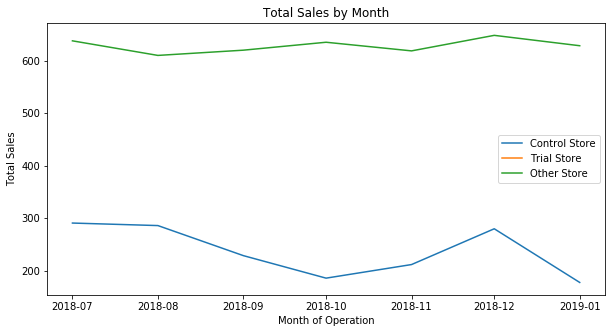

In [46]:
#Plot tatol sales by month for 3 types of stores
plt.figure(figsize=(10,5))
plt.plot(conbineSalesPlot)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store','Trial Store','Other Store'],loc=5)

<h3>'Ncustomers'</h3>

In [47]:
#Create relevant dataframes
controlCustomersPlot=Pastsales.loc[Pastsales['store_type']=='Control Store',['TransactionMonth','Ncustomers']]
controlCustomersPlot.set_index('TransactionMonth',inplace=True)
controlCustomersPlot.rename(columns={'Ncustomers':'Control Store'},inplace=True)
trialCustomersPlot=Pastsales.loc[Pastsales['store_type']=='Trial Store',['TransactionMonth','Ncustomers']]
trialCustomersPlot.set_index('TransactionMonth',inplace=True)
trialCustomersPlot.rename(columns={'Ncustomers':'Trial Store'},inplace=True)
otherCustomersPlot=Pastsales.loc[Pastsales['store_type']=='Other Stores',['TransactionMonth','Ncustomers']]
otherCustomersPlot=pd.DataFrame(otherCustomersPlot.groupby('TransactionMonth').Ncustomers.mean())
otherCustomersPlot.rename(columns={'Ncustomers':'Other Store'},inplace=True)

#Concatenate
conbineCustomersPlot=pd.concat([controlCustomersPlot,trialCustomersPlot,otherCustomersPlot], axis=1)
conbineCustomersPlot

,Control Store,Trial Store,Other Store
TransactionMonth,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884
2018-12-01,47,46,73.515504
2019-01-01,35,35,71.240310


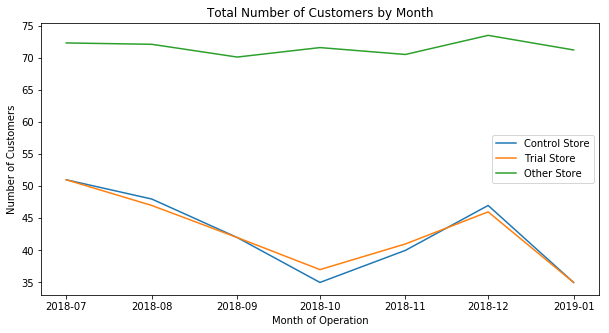

In [48]:
#Plot tatol number of customers by month for 3 types of stores
plt.figure(figsize=(10,5))
plt.plot(conbineCustomersPlot)
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Store','Trial Store','Other Store'],loc=5)

<h3>Assessment of trail for trial store 77</h3>

The trial period goes from the start of Feb 2019 to end of Apr 2019, we now want to see if there has been an uplit in total chip sales.

In [49]:
Pretrialmeasures.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [50]:
# Working out a scaling factor to applied to the control store
# Computing this by dividing sum of 'Totsales' for trial store by sum of 'Totsales' for control store
# Create the variable called 'scalingFactorSales'
trial_sum=Pretrialmeasures.loc[Pretrialmeasures['store_type']=='Trial Store','Totsales'].sum()
control_sum=Pretrialmeasures.loc[Pretrialmeasures['store_type']=='Control Store','Totsales'].sum()
scalingFactorSales=trial_sum / control_sum
scalingFactorSales

1.023617303289553

In [51]:
#Recall our dataframe 'Measureovertime'
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [52]:
#Create new dataframe call 'scaledControlSales' and reset index
scaledControlSales=Measureovertime
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [53]:
#show the control stores, i.e. store 233
scaledControlSales=scaledControlSales.loc[scaledControlSales['STORE_NBR']==control_store]
scaledControlSales

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit
2699,233,201807,290.7,51,1.058824,1.629630,3.303409
2700,233,201808,285.9,48,1.041667,1.600000,3.573750
2701,233,201809,228.6,42,1.071429,1.555556,3.265714
2702,233,201810,185.7,35,1.028571,1.555556,3.316071
2703,233,201811,211.6,40,1.025000,1.512195,3.412903
2704,233,201812,279.8,47,1.063830,1.500000,3.730667
2705,233,201901,177.5,35,1.000000,1.342857,3.776596
2706,233,201902,244.0,45,1.044444,1.489362,3.485714
2707,233,201903,199.1,40,1.025000,1.439024,3.374576
2708,233,201904,158.6,30,1.066667,1.437500,3.447826


In [54]:
#Create 'controlSales' which applies 'scalingFactorSales' to 'Totsales' column
scaledControlSales['controlSales']=scaledControlSales['Totsales']*scalingFactorSales
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,controlSales
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421


In [55]:
#Create 'percentageDiff' dataframe
percentageDiff=scaledControlSales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop=True, inplace=True)

#Concatenate with trail store 'Totsales'
trialSales=Measureovertime.loc[Measureovertime['STORE_NBR']==trial_store, 'Totsales']
trialSales.reset_index(drop=True, inplace=True)
percentageDiff=pd.concat([percentageDiff,trialSales], axis=1) #axis indicates the direction of the connection, axis=1, which means that a new column will be added
percentageDiff.rename(columns={'Totsales':'trialSales'}, inplace=True)
percentageDiff

,YEARMONTH,controlSales,trialSales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [56]:
#Calculate percentage diffference and put it in a new column
percentageDiff['percentageDiff']=abs(percentageDiff.controlSales-percentageDiff.trialSales)/percentageDiff.controlSales
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [57]:
#Statistics
from statistics import stdev
from scipy.stats import t

In [58]:
#Our null hypothesis is such that the trail period is the same as the pre-trail period
#Take the Standard Deviation based on the scaled percentage differenve in the pre-trail period
stdDev=stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.049940762641425544

In [59]:
#Define the degrees of freedom
#Becasuse we have 8 pre-trail month dof= n-1= 8-1 =7
dof = 7

In [60]:
#Create a new column for'tValue'
percentageDiff['tValue']=(percentageDiff['percentageDiff']-0)/stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH']> 201901) & (percentageDiff['YEARMONTH']<201905),'tValue']

7     1.183534
8     7.339116
9    12.476373
Name: tValue, dtype: float64

In [61]:
#Find the 95% value of t distribution with dof=7
t.isf(0.05, dof)

1.8945786050613054

tValue is much larger than 95% value of t distribution for March to April

In [62]:
#Recall the 'scaledControlSales' dataframe
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,controlSales
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421


In [63]:
#Add a new column 'TransactionMonth' to 'scaledControlSales'
scaledControlSales['TransactionMonth']=pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format='%Y%m')
scaledControlSales

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,controlSales,TransactionMonth
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,297.565550,2018-07-01
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,292.652187,2018-08-01
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,233.998916,2018-09-01
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,190.085733,2018-10-01
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,216.597421,2018-11-01
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,286.408121,2018-12-01
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071,2019-01-01
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,249.762622,2019-02-01
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,203.802205,2019-03-01
2708,233,201904,158.6,30,1.066667,1.437500,3.447826,162.345704,2019-04-01


In [64]:
#Create appropriat dataframe
#Extract 'controlSales' from 'scaledControlSales' dataframe for control store
controlSales=scaledControlSales.loc[:,['TransactionMonth','controlSales']]
controlSales.set_index('TransactionMonth', inplace=True)
controlSales.rename(columns = {'controlSales':'Control Sales'}, inplace=True)
controlSales

,Control Sales
TransactionMonth,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [65]:
# Recall 'Measureovertime' dataframe
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [66]:
#Create a new column 'TransactionMonth' under 'Measureovertime' dataframe
Measureovertime['TransactionMonth']=pd.to_datetime(Measureovertime['YEARMONTH'].astype(str), format='%Y%m')
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [67]:
#Extrcat 'Totsales' for trail store from 'Measureovertime'
trialSales = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, ['TransactionMonth', 'Totsales']]
trialSales.set_index('TransactionMonth', inplace = True)
trialSales.rename(columns = {'Totsales': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [68]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [69]:
# Merge the two dataframes together 'controlSales' and 'trialSales'
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TransactionMonth,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


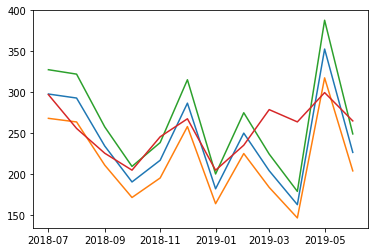

In [70]:
plt.plot(combineSales)

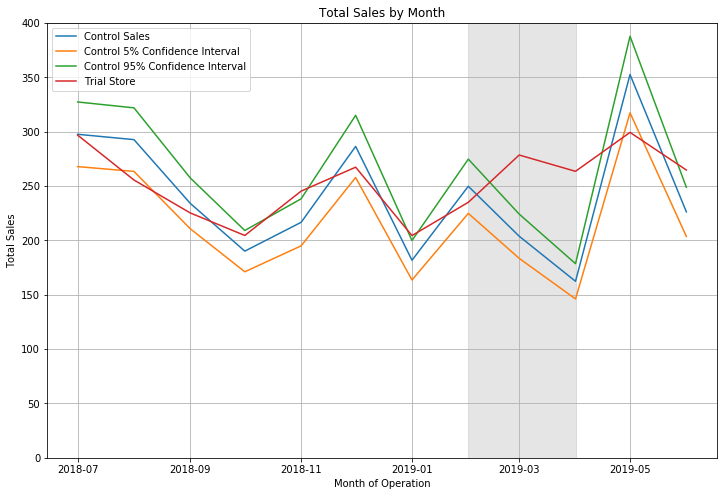

In [71]:
# Let's embellish the plot

# Make it bigger
plt.figure(figsize = (12, 8))
plt.plot(combineSales)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

# Set new y-axis limit
plt.ylim((0, 400))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The results show that the trial in store 77 is significantly different to its control store in the trial period
The trial store performance lies outside the 5% and 95% confidence intervals in the two of the 3 trial months

<h3>'Ncustomers'</h3>

In [72]:
# Compute scaling factor
trial_customers = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Trial Store' , 'Ncustomers'].sum()
control_customers = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Control Store', 'Ncustomers'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

1.0033557046979866

In [73]:
scaledControlCustomers = Measureovertime
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [74]:
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01


In [75]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Ncustomers'] * scalingFactorCustomers
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlCustomers
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01,51.171141
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01,48.161074
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01,42.140940
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01,35.117450
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01,40.134228


In [76]:
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['YEARMONTH', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, 'Ncustomers']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'Ncustomers': 'trialCustomers'}, inplace = True)

percentageDiff

,YEARMONTH,controlCustomers,trialCustomers
0,201807,51.171141,51
1,201808,48.161074,47
2,201809,42.140940,42
3,201810,35.117450,37
4,201811,40.134228,41
5,201812,47.157718,46
6,201901,35.117450,35
7,201902,45.151007,45
8,201903,40.134228,50
9,201904,30.100671,47


In [77]:
# Calculate percentage difference and put it in a new column
percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,51.171141,51,0.003344
1,201808,48.161074,47,0.024108
2,201809,42.140940,42,0.003344
3,201810,35.117450,37,0.053607
4,201811,40.134228,41,0.021572
5,201812,47.157718,46,0.024550
6,201901,35.117450,35,0.003344
7,201902,45.151007,45,0.003344
8,201903,40.134228,50,0.245819
9,201904,30.100671,47,0.561427


In [78]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.018240748558243945

In [79]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7

In [80]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'tValue']

7     0.183352
8    13.476388
9    30.778725
Name: tValue, dtype: float64

In [81]:
# Find the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

We can see that the t-value is much larger than the 95th percentile value of the t-distribution for March and April

In [82]:
# Create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 
controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'controlCustomers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TransactionMonth,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450
2019-02-01,45.151007
2019-03-01,40.134228


In [83]:
# Extract 'Ncustomers' for trial store from 'measureOverTime'
trialCustomers = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, ['TransactionMonth', 'Ncustomers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'Ncustomers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35
2019-02-01,45
2019-03-01,50


In [84]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval
controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587
2019-02-01,45.151007,43.503830,46.798183
2019-03-01,40.134228,38.670071,41.598385


In [85]:
# Merge the two dataframes together 'controlSales' and 'trialSales'
combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
TransactionMonth,,,,
2018-07-01,51.171141,49.304341,53.037941,51
2018-08-01,48.161074,46.404086,49.918062,47
2018-09-01,42.140940,40.603575,43.678304,42
2018-10-01,35.117450,33.836313,36.398587,37
2018-11-01,40.134228,38.670071,41.598385,41
2018-12-01,47.157718,45.437334,48.878102,46
2019-01-01,35.117450,33.836313,36.398587,35
2019-02-01,45.151007,43.503830,46.798183,45
2019-03-01,40.134228,38.670071,41.598385,50


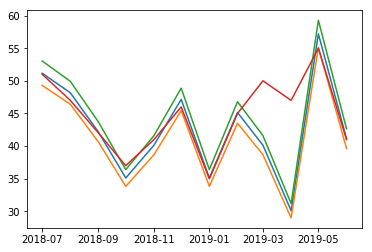

In [86]:
plt.plot(combineCustomers)

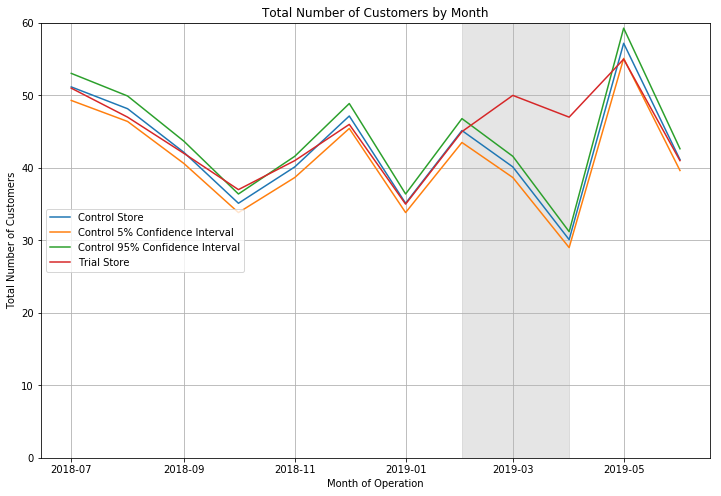

In [87]:
# Embellish the plot

# Change the size
plt.figure(figsize = (12, 8))
plt.plot(combineCustomers)

# Set graph title and axis title
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 6)

# Set new y-axis limit
plt.ylim((0, 60))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

Let's repeat finding the control store and assessing the impact of the trial for each of the two other trial stores i.e. 86 and 88

<h2>Selecting control store for trial store 86</h2>

In [88]:
# Compute correlation with trial store 86
trial_store = 86
corr_Nsales = CalculateCorrelation(Pretrialmeasures, 'Totsales', trial_store)
corr_Ncustomers = CalculateCorrelation(Pretrialmeasures, 'Ncustomers', trial_store)

# Compute magnitude with trial store 86
magnitude_Nsales = CalculateMagnitudeDistance(Pretrialmeasures, 'Totsales', trial_store)
magnitude_Ncustomers = CalculateMagnitudeDistance(Pretrialmeasures, 'Ncustomers', trial_store)

<h3>'Nsales'</h3>

In [89]:
# Concatenate the scores together for 'Nsales'
score_Nsales = pd.concat([corr_Nsales, magnitude_Nsales['Magnitude']], axis = 1)

In [90]:
# Add an additional column which calculates the weighted average
corr_weight = 0.5
score_Nsales['scoreNsales'] = corr_weight * score_Nsales['Correlation'] + (1 - corr_weight) * score_Nsales['Magnitude']
score_Nsales.head()

,Store1,Store2,Correlation,Magnitude,scoreNsales
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497


<h3>'Ncustomers'</h3>

In [91]:
# Concatenate
score_Ncustomers = pd.concat([corr_Ncustomers, magnitude_Ncustomers['Magnitude']], axis = 1)
score_Ncustomers.head()

,Store1,Store2,Correlation,Magnitude
0,86.0,1.0,0.485831,0.510204
1,86.0,2.0,-0.086161,0.428571
2,86.0,3.0,-0.353786,0.563025
3,86.0,4.0,-0.169608,0.537815
4,86.0,5.0,-0.253229,0.714286


In [92]:
# Add a new column for weighted average
score_Ncustomers['scoreNcust'] = corr_weight * score_Ncustomers['Correlation'] + (1 - corr_weight) * score_Ncustomers['Magnitude']
score_Ncustomers.head()

,Store1,Store2,Correlation,Magnitude,scoreNcust
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [93]:
# Index both 'score_Nsales' and 'score_Ncustomers' dataframe
score_Nsales.set_index(['Store1', 'Store2'], inplace = True)
score_Ncustomers.set_index(['Store1', 'Store2'], inplace = True)

In [94]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNsales' and 'scoreNcust'
score_Control = pd.concat([score_Nsales['scoreNsales'], score_Ncustomers['scoreNcust']], axis = 1)
score_Control

scoreNsales  scoreNcust
Store1 Store2                         
86.0   1.0        0.466983    0.498018
       2.0       -0.041352    0.171205
       3.0        0.123116    0.104620
       4.0        0.298309    0.184103
       5.0        0.407497    0.230528
       6.0        0.579682    0.572315
       7.0        0.400538    0.460620
       8.0        0.167491    0.105569
       9.0        0.308019    0.115968
       10.0       0.459142    0.231291
       12.0       0.393115    0.225410
       13.0       0.438119    0.337484
       14.0       0.320426    0.370349
       15.0       0.108632   -0.044427
       16.0       0.013674    0.224896
       17.0       0.301593    0.227838
       18.0       0.409226    0.521874
       19.0       0.109368    0.000666
       20.0       0.225761    0.297025
       21.0       0.011507    0.003470
       22.0       0.590824    0.382032
       23.0      -0.209267   -0.164637
       24.0       0.329977    0.221756
       25.0       0.607499    0.473230
       26.0       0.381627    0.148432
       27.0      -0.145373   -0.065536
       28.0       0.358631    0.122594
       29.0       0.126639    0.036894
       30.0       0.006618    0.236886
       32.0       0.506363    0.430491
...                    ...         ...
       242.0      0.421584    0.257520
       243.0     -0.043528   -0.081765
       244.0      0.195525    0.469213
       245.0      0.401742    0.118844
       246.0      0.272153    0.287921
       247.0      0.586434    0.402842
       248.0      0.216212    0.077171
       249.0      0.172583    0.278872
       250.0      0.011577    0.140765
       251.0      0.470274    0.367785
       253.0      0.487550    0.337067
       254.0     -0.202427    0.018547
       255.0      0.579089    0.407020
       256.0     -0.241034   -0.050884
       257.0      0.228046    0.061930
       258.0      0.242569    0.161581
       259.0      0.382149   -0.218839
       260.0      0.558740    0.637537
       261.0      0.151756    0.161365
       262.0      0.339888    0.586852
       263.0      0.242702    0.369735
       264.0      0.037422    0.125166
       265.0      0.148234    0.136472
       266.0      0.127126    0.080617
       267.0      0.155361    0.100665
       268.0     -0.080126    0.266027
       269.0      0.588661    0.241523
       270.0     -0.106832   -0.058237
       271.0      0.546651    0.432804
       272.0      0.294383    0.139863

[260 rows x 2 columns]

In [95]:
# Add a new column to 'score_Control' which computes the average of 'scoreNsales' and 'scoreNcust'
score_Control['Finalcontrolscore'] = 0.5 * (score_Control['scoreNsales'] + score_Control['scoreNcust'])
score_Control.head()

scoreNsales  scoreNcust  Finalcontrolscore
Store1 Store2                                            
86.0   1.0        0.466983    0.498018           0.482500
       2.0       -0.041352    0.171205           0.064927
       3.0        0.123116    0.104620           0.113868
       4.0        0.298309    0.184103           0.241206
       5.0        0.407497    0.230528           0.319013

In [96]:
# Top 5 stores with highest 'Finalcontrolscore'
score_Control.sort_values(by = 'Finalcontrolscore', ascending = False).head()

scoreNsales  scoreNcust  Finalcontrolscore
Store1 Store2                                            
86.0   155.0      0.808106    0.733343           0.770724
       109.0      0.697120    0.742532           0.719826
       114.0      0.631393    0.663384           0.647389
       225.0      0.601841    0.684356           0.643099
       138.0      0.593296    0.660565           0.626930

Comment: store 155 matches trial store 86 the most

In [97]:
# Set control store 155 as 'control_store'
control_store = 155

In [98]:
# Create a new dataframe 'Pastsales'
Pastsales = Pretrialmeasures

# Create a new column within 'Pastsales' which categorises store type
store_type = []

for i in Pastsales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

Pastsales['store_type'] = store_type
Pastsales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [99]:
# Turn 'YEARMONTH' from an int64 to a datetime variable to able to plot
# Create a new column 'TransactionMonth'
Pastsales['TransactionMonth'] = pd.to_datetime(Pastsales['YEARMONTH'].astype(str), format = '%Y%m')
Pastsales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [100]:
# Create 'Totsales' visualisation for control store, trial store and other stores

# First create relevant dataframes 
controlSalesPlot = Pastsales.loc[Pastsales['store_type'] == 'Control Store', ['TransactionMonth', 'Totsales']]
controlSalesPlot.set_index('TransactionMonth', inplace = True)
controlSalesPlot.rename(columns = {'Totsales': 'Control Store'}, inplace = True)
trialSalesPlot = Pastsales.loc[Pastsales['store_type'] == 'Trial Store', ['TransactionMonth', 'Totsales']]
trialSalesPlot.set_index('TransactionMonth', inplace = True)
trialSalesPlot.rename(columns = {'Totsales': 'Trial Store'}, inplace = True)
otherSalesPlot = Pastsales.loc[Pastsales['store_type'] == 'Other Stores', ['TransactionMonth', 'Totsales']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').Totsales.mean())
otherSalesPlot.rename(columns = {'Totsales': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot = pd.concat([controlSalesPlot, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot

,Control Store,Trial Store,Other Stores
TransactionMonth,,,
2018-07-01,924.6,892.20,633.239922
2018-08-01,782.7,764.05,606.326744
2018-09-01,1014.4,914.60,614.480620
2018-10-01,963.8,948.40,629.415504
2018-11-01,898.8,918.00,613.593411
2018-12-01,849.8,841.20,644.020155
2019-01-01,874.6,841.40,623.513566


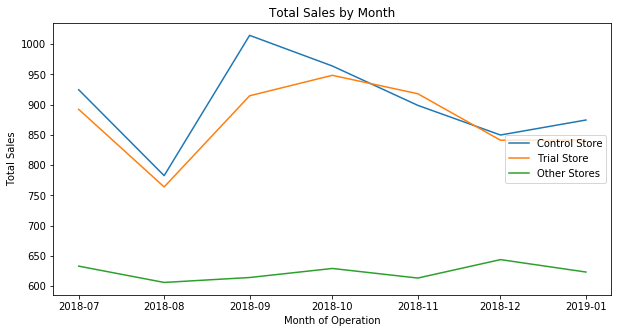

In [101]:
# Plot total sales by month for all 3 types of stores
plt.figure(figsize = (10, 5))
plt.plot(combineSalesPlot)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

<h3>'Ncustomers'</h3>

In [102]:
# Create relevant dataframes 
controlCustomersPlot = Pastsales.loc[Pastsales['store_type'] == 'Control Store', ['TransactionMonth', 'Ncustomers']]
controlCustomersPlot.set_index('TransactionMonth', inplace = True)
controlCustomersPlot.rename(columns = {'Ncustomers': 'Control Store'}, inplace = True)
trialCustomersPlot = Pastsales.loc[Pastsales['store_type'] == 'Trial Store', ['TransactionMonth', 'Ncustomers']]
trialCustomersPlot.set_index('TransactionMonth', inplace = True)
trialCustomersPlot.rename(columns = {'Ncustomers': 'Trial Store'}, inplace = True)
otherCustomersPlot = Pastsales.loc[Pastsales['store_type'] == 'Other Stores', ['TransactionMonth', 'Ncustomers']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TransactionMonth').Ncustomers.mean())
otherCustomersPlot.rename(columns = {'Ncustomers': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot = pd.concat([controlCustomersPlot, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot

,Control Store,Trial Store,Other Stores
TransactionMonth,,,
2018-07-01,101,99,71.953488
2018-08-01,91,94,71.771318
2018-09-01,103,103,69.658915
2018-10-01,108,109,71.046512
2018-11-01,101,100,70.069767
2018-12-01,97,98,73.120155
2019-01-01,96,94,70.775194


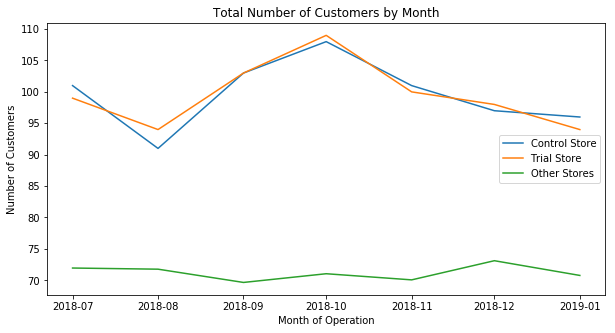

In [103]:
# Plot total number of customers for all 3 types of stores
plt.figure(figsize = (10, 5))
plt.plot(combineCustomersPlot)
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

<h2>Assessment for trial for trial store 86</h2>

In [104]:
# Computing a scaling factor to applied to the control store
# Computing this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store
trial_sum = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Trial Store' , 'Totsales'].sum()
control_sum = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Control Store', 'Totsales'].sum()
scalingFactorSales = trial_sum / control_sum
scalingFactorSales

0.9700651481287746

In [105]:
# Recall 'Measureovertime'  dataframe
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [106]:
# Create dataframe and reset index
scaledControlSales = Measureovertime
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [107]:
# Control store number = 155
scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
1793,155,201807,924.60,101,1.217822,2.032520,3.698400,2018-07-01
1794,155,201808,782.70,91,1.307692,1.924370,3.417904,2018-08-01
1795,155,201809,1014.40,103,1.398058,2.013889,3.497931,2018-09-01
1796,155,201810,963.80,108,1.259259,2.000000,3.543382,2018-10-01
1797,155,201811,898.80,101,1.316832,2.030075,3.328889,2018-11-01
1798,155,201812,849.80,97,1.237113,2.016667,3.511570,2018-12-01
1799,155,201901,874.60,96,1.302083,2.016000,3.470635,2019-01-01
1800,155,201902,891.20,95,1.315789,2.032000,3.508661,2019-02-01
1801,155,201903,804.40,94,1.255319,2.033898,3.351667,2019-03-01
1802,155,201904,844.60,99,1.212121,2.016667,3.490083,2019-04-01


In [108]:
# Create 'controlSales' which applies 'scalingFactorSales' to 'Totsales' column
scaledControlSales['controlSales'] = scaledControlSales['Totsales'] * scalingFactorSales
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlSales
1793,155,201807,924.6,101,1.217822,2.032520,3.698400,2018-07-01,896.922236
1794,155,201808,782.7,91,1.307692,1.924370,3.417904,2018-08-01,759.269991
1795,155,201809,1014.4,103,1.398058,2.013889,3.497931,2018-09-01,984.034086
1796,155,201810,963.8,108,1.259259,2.000000,3.543382,2018-10-01,934.948790
1797,155,201811,898.8,101,1.316832,2.030075,3.328889,2018-11-01,871.894555


In [109]:
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlSales[['YEARMONTH', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'Totsales'
trialSales = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, 'Totsales']
trialSales.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'Totsales': 'trialSales'}, inplace = True)

In [110]:
# Calculate percentage difference and create in a new column
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


In [111]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.025833952854772586

In [112]:
# Recall 'scaledControlSales' dataframe
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlSales
1793,155,201807,924.6,101,1.217822,2.032520,3.698400,2018-07-01,896.922236
1794,155,201808,782.7,91,1.307692,1.924370,3.417904,2018-08-01,759.269991
1795,155,201809,1014.4,103,1.398058,2.013889,3.497931,2018-09-01,984.034086
1796,155,201810,963.8,108,1.259259,2.000000,3.543382,2018-10-01,934.948790
1797,155,201811,898.8,101,1.316832,2.030075,3.328889,2018-11-01,871.894555


In [113]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlSales

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlSales
1793,155,201807,924.60,101,1.217822,2.032520,3.698400,2018-07-01,896.922236
1794,155,201808,782.70,91,1.307692,1.924370,3.417904,2018-08-01,759.269991
1795,155,201809,1014.40,103,1.398058,2.013889,3.497931,2018-09-01,984.034086
1796,155,201810,963.80,108,1.259259,2.000000,3.543382,2018-10-01,934.948790
1797,155,201811,898.80,101,1.316832,2.030075,3.328889,2018-11-01,871.894555
1798,155,201812,849.80,97,1.237113,2.016667,3.511570,2018-12-01,824.361363
1799,155,201901,874.60,96,1.302083,2.016000,3.470635,2019-01-01,848.418979
1800,155,201902,891.20,95,1.315789,2.032000,3.508661,2019-02-01,864.522060
1801,155,201903,804.40,94,1.255319,2.033898,3.351667,2019-03-01,780.320405
1802,155,201904,844.60,99,1.212121,2.016667,3.490083,2019-04-01,819.317024


In [114]:
# Create the appropriate dataframe
# Extract 'controlSales' from 'scaledControlSales' dataframe for control store 
controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)

In [115]:
# Create a new column 'TransationMonth' under 'Measureovertime' dataframe
Measureovertime['TransactionMonth'] = pd.to_datetime(Measureovertime['YEARMONTH'].astype(str), format = '%Y%m')
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [116]:
# Extract 'Totsales' for trial store from 'Measureovertime'
trialSales = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, ['TransactionMonth', 'Totsales']]
trialSales.set_index('TransactionMonth', inplace = True)
trialSales.rename(columns = {'Totsales': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,892.20
2018-08-01,764.05
2018-09-01,914.60
2018-10-01,948.40
2018-11-01,918.00
2018-12-01,841.20
2019-01-01,841.40
2019-02-01,913.20
2019-03-01,1026.80


In [117]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,896.922236,850.580142,943.264329
2018-08-01,759.269991,720.040101,798.499882
2018-09-01,984.034086,933.191106,1034.877067
2018-10-01,934.948790,886.641944,983.255636
2018-11-01,871.894555,826.845589,916.943521
2018-12-01,824.361363,781.768338,866.954388
2019-01-01,848.418979,804.582947,892.255010
2019-02-01,864.522060,819.854016,909.190104
2019-03-01,780.320405,740.002884,820.637926


In [118]:
# Merge the two dataframes together 'controlSales' and 'trialSales'
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TransactionMonth,,,,
2018-07-01,896.922236,850.580142,943.264329,892.20
2018-08-01,759.269991,720.040101,798.499882,764.05
2018-09-01,984.034086,933.191106,1034.877067,914.60
2018-10-01,934.948790,886.641944,983.255636,948.40
2018-11-01,871.894555,826.845589,916.943521,918.00
2018-12-01,824.361363,781.768338,866.954388,841.20
2019-01-01,848.418979,804.582947,892.255010,841.40
2019-02-01,864.522060,819.854016,909.190104,913.20
2019-03-01,780.320405,740.002884,820.637926,1026.80


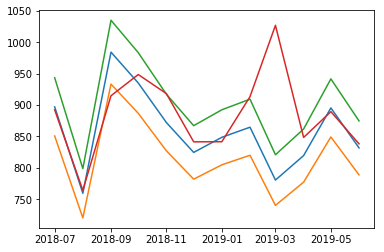

In [119]:
plt.plot(combineSales)

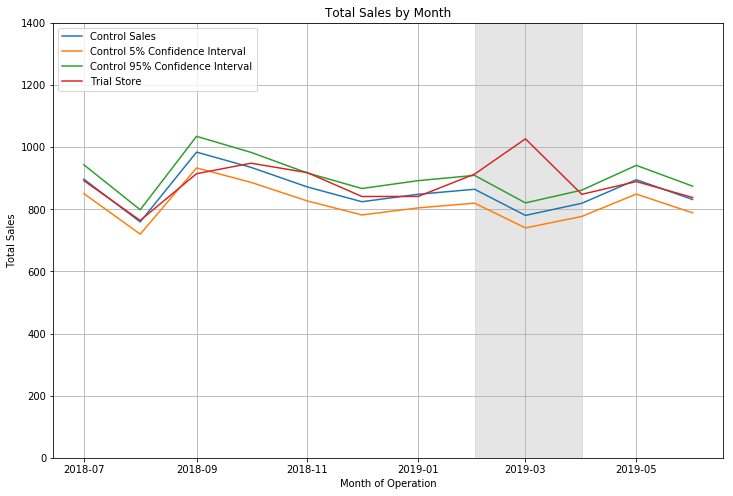

In [120]:
# Embellish the plot

# Change the size
plt.figure(figsize = (12, 8))
plt.plot(combineSales)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

# Set new y-axis limit
plt.ylim((0, 1400))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The line chart show that the trial in store 86 is not significantly different to its control store in the trial period.
The trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months

<h3>'Ncustomers'</h3>

In [121]:
# Compute scaling factor
trial_customers = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Trial Store' , 'Ncustomers'].sum()
control_customers = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Control Store', 'Ncustomers'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

1.0

In [122]:
scaledControlCustomers = Measureovertime
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [123]:
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
1793,155,201807,924.6,101,1.217822,2.032520,3.698400,2018-07-01
1794,155,201808,782.7,91,1.307692,1.924370,3.417904,2018-08-01
1795,155,201809,1014.4,103,1.398058,2.013889,3.497931,2018-09-01
1796,155,201810,963.8,108,1.259259,2.000000,3.543382,2018-10-01
1797,155,201811,898.8,101,1.316832,2.030075,3.328889,2018-11-01


In [124]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Ncustomers'] * scalingFactorCustomers
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlCustomers
1793,155,201807,924.6,101,1.217822,2.032520,3.698400,2018-07-01,101.0
1794,155,201808,782.7,91,1.307692,1.924370,3.417904,2018-08-01,91.0
1795,155,201809,1014.4,103,1.398058,2.013889,3.497931,2018-09-01,103.0
1796,155,201810,963.8,108,1.259259,2.000000,3.543382,2018-10-01,108.0
1797,155,201811,898.8,101,1.316832,2.030075,3.328889,2018-11-01,101.0


In [125]:
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['YEARMONTH', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, 'Ncustomers']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'Ncustomers': 'trialCustomers'}, inplace = True)

percentageDiff

,YEARMONTH,controlCustomers,trialCustomers
0,201807,101.0,99
1,201808,91.0,94
2,201809,103.0,103
3,201810,108.0,109
4,201811,101.0,100
5,201812,97.0,98
6,201901,96.0,94
7,201902,95.0,107
8,201903,94.0,115
9,201904,99.0,105


In [126]:
# Calculate percentage difference and create in a new column
percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,101.0,99,0.019802
1,201808,91.0,94,0.032967
2,201809,103.0,103,0.000000
3,201810,108.0,109,0.009259
4,201811,101.0,100,0.009901
5,201812,97.0,98,0.010309
6,201901,96.0,94,0.020833
7,201902,95.0,107,0.126316
8,201903,94.0,115,0.223404
9,201904,99.0,105,0.060606


In [127]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.010687444701395236

In [128]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7

In [129]:
# Create a new column for 'tValue'
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'tValue']

7    11.819082
8    20.903430
9     5.670772
Name: tValue, dtype: float64

In [130]:
# Find the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

We can see that the tValue is larger than the 95th percentile value of the t-distribution

In [131]:
# Create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 
controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'controlCustomers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TransactionMonth,
2018-07-01,101.0
2018-08-01,91.0
2018-09-01,103.0
2018-10-01,108.0
2018-11-01,101.0
2018-12-01,97.0
2019-01-01,96.0
2019-02-01,95.0
2019-03-01,94.0


In [132]:
# Extract 'Ncustomers' for trial store from 'Measureovertime'
trialCustomers = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, ['TransactionMonth', 'Ncustomers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'Ncustomers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,99
2018-08-01,94
2018-09-01,103
2018-10-01,109
2018-11-01,100
2018-12-01,98
2019-01-01,94
2019-02-01,107
2019-03-01,115


In [133]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval
controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,101.0,98.841136,103.158864
2018-08-01,91.0,89.054885,92.945115
2018-09-01,103.0,100.798386,105.201614
2018-10-01,108.0,105.691512,110.308488
2018-11-01,101.0,98.841136,103.158864
2018-12-01,97.0,94.926636,99.073364
2019-01-01,96.0,93.948011,98.051989
2019-02-01,95.0,92.969386,97.030614
2019-03-01,94.0,91.990760,96.009240


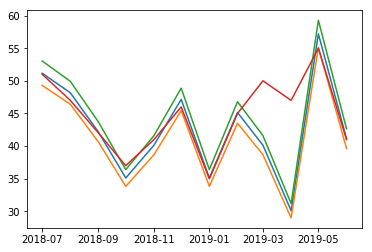

In [134]:
plt.plot(combineCustomers)

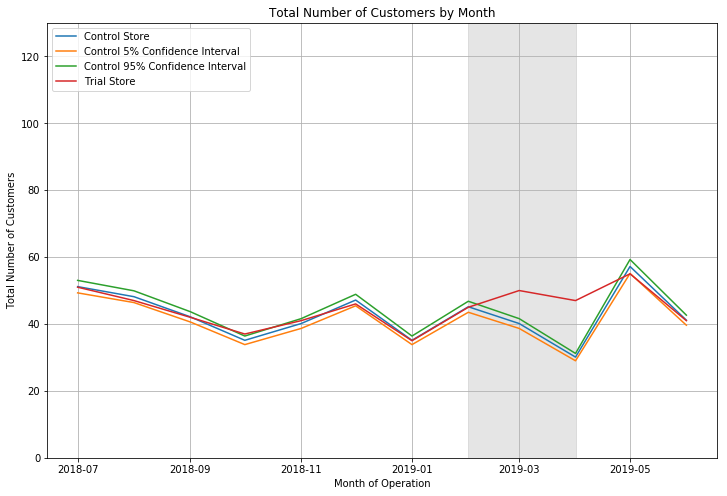

In [135]:
# Embellish the plot

# Change the size
plt.figure(figsize = (12, 8))
plt.plot(combineCustomers)

# Set graph title and axis title
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

# Set new y-axis limit
plt.ylim((0, 130))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that 
the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were 
not significantly higher. We should check with the Category Manager if there were special deals in the trial store 
that were may have resulted in lower prices, impacting the results

# Selecting control store for trial store 88

<ul>
<li>Calculate the correlation of the sales and
number of customers of each potential control store to the trial store</li>
<li>Calculate the magnitude distance of the
sales and number of customers of each potential control store to the trial store</li>
</ul>

In [139]:
# Now let's use those two functions to find the control store
# Compute correlation with trial store 88 
trial_store = 88
corr_Nsales = CalculateCorrelation(Pretrialmeasures, 'Totsales', trial_store)
corr_Ncustomers = CalculateCorrelation(Pretrialmeasures, 'Ncustomers', trial_store)

# Compute magnitude with trial store 88
magnitude_Nsales = CalculateMagnitudeDistance(Pretrialmeasures, 'Totsales', trial_store)
magnitude_Ncustomers = CalculateMagnitudeDistance(Pretrialmeasures, 'Ncustomers', trial_store)

In [140]:
#Show the first five dataframe
corr_Nsales.head()

,Store1,Store2,Correlation
0,88.0,1.0,0.813636
1,88.0,2.0,-0.067927
2,88.0,3.0,-0.507847
3,88.0,4.0,-0.745566
4,88.0,5.0,0.190330


In [142]:
magnitude_Nsales

,Store1,Store2,Magnitude
0,88.0,1.0,0.548959
1,88.0,2.0,0.541212
2,88.0,3.0,0.458109
3,88.0,4.0,0.484447
4,88.0,5.0,0.496409
5,88.0,6.0,0.641518
6,88.0,7.0,0.573287
7,88.0,8.0,0.535784
8,88.0,9.0,0.378652
9,88.0,10.0,0.555390


In [143]:
# Concatenate the scores together for 'Nsales'
score_Nsales = pd.concat([corr_Nsales, magnitude_Nsales['Magnitude']], axis = 1)

Create a combined score composed of correlation and magnitude by merging the
correlations table and the magnitudes table, for each driver.

In [144]:
# Add an additional column which calculates the weighted average
corr_weight = 0.5
score_Nsales['scoreNsales'] = corr_weight * score_Nsales['Correlation'] + (1 - corr_weight) * score_Nsales['Magnitude']
score_Nsales.head()

,Store1,Store2,Correlation,Magnitude,scoreNsales
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370


In [145]:
# Now do the same for 'Ncustomers'
score_Ncustomers = pd.concat([corr_Ncustomers, magnitude_Ncustomers['Magnitude']], axis = 1)
score_Ncustomers.head()

,Store1,Store2,Correlation,Magnitude
0,88.0,1.0,0.305334,0.357143
1,88.0,2.0,-0.452379,0.285714
2,88.0,3.0,0.522884,0.683673
3,88.0,4.0,-0.361503,0.577922
4,88.0,5.0,-0.025320,0.558442


In [146]:
# Again add a new column for weighted average
score_Ncustomers['scoreNcust'] = corr_weight * score_Ncustomers['Correlation'] + (1 - corr_weight) * score_Ncustomers['Magnitude']
score_Ncustomers.head()

,Store1,Store2,Correlation,Magnitude,scoreNcust
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [147]:
# Index both 'score_Nsales' and 'score_Ncustomers' dataframe
score_Nsales.set_index(['Store1', 'Store2'], inplace = True)
score_Ncustomers.set_index(['Store1', 'Store2'], inplace = True)

Combine scores across the drivers by merging sales scores and customer scores,
and compute a final combined score.

In [148]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNsales' and 'scoreNcust'
score_Control = pd.concat([score_Nsales['scoreNsales'], score_Ncustomers['scoreNcust']], axis = 1)
score_Control

scoreNsales  scoreNcust
Store1 Store2                         
88.0   1.0        0.681297    0.331238
       2.0        0.236643   -0.083332
       3.0       -0.024869    0.603279
       4.0       -0.130559    0.108210
       5.0        0.343370    0.266561
       6.0        0.437457    0.438002
       7.0        0.611472    0.386640
       8.0       -0.140256    0.005591
       9.0        0.226223   -0.078797
       10.0       0.562819    0.137951
       12.0       0.202296    0.326123
       13.0       0.305290    0.396700
       14.0       0.646064    0.685774
       15.0       0.134522    0.165251
       16.0       0.219106    0.036350
       17.0       0.157668    0.441367
       18.0       0.215800    0.202057
       19.0      -0.081841   -0.247593
       20.0       0.152017    0.277135
       21.0       0.310992    0.561124
       22.0       0.169610   -0.006601
       23.0      -0.083099    0.188131
       24.0       0.319961   -0.072500
       25.0       0.409394    0.258567
       26.0       0.369513    0.429669
       27.0       0.153033    0.559337
       28.0       0.389009    0.400880
       29.0       0.237948   -0.085222
       30.0       0.140367    0.476238
       32.0       0.408776    0.488525
...                    ...         ...
       242.0      0.181818   -0.017713
       243.0      0.170193    0.071662
       244.0      0.210559    0.138977
       245.0      0.383156    0.417800
       246.0      0.282576    0.164440
       247.0      0.162301   -0.196639
       248.0      0.440195    0.514974
       249.0      0.237125    0.246942
       250.0      0.094869    0.532324
       251.0      0.317066    0.476945
       253.0      0.666914    0.520889
       254.0      0.174501    0.610237
       255.0      0.301224    0.137182
       256.0      0.058346    0.093085
       257.0      0.426590    0.600569
       258.0      0.270737   -0.242290
       259.0      0.382375    0.204196
       260.0      0.360976    0.230198
       261.0     -0.044804    0.350186
       262.0      0.295793    0.075587
       263.0      0.142873    0.245874
       264.0     -0.030860    0.165978
       265.0      0.254262    0.693234
       266.0      0.240557   -0.119913
       267.0      0.299947    0.015775
       268.0      0.250709    0.651462
       269.0      0.196139    0.043061
       270.0     -0.104971    0.132467
       271.0      0.163091    0.318507
       272.0     -0.077482    0.237944

[260 rows x 2 columns]

In [149]:
# Add a new column to 'score_Control' which computes the average of 'scoreNsales' and 'scoreNcust'
score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNsales'] + score_Control['scoreNcust'])
score_Control.head()

scoreNsales  scoreNcust  finalControlScore
Store1 Store2                                            
88.0   1.0        0.681297    0.331238           0.506268
       2.0        0.236643   -0.083332           0.076655
       3.0       -0.024869    0.603279           0.289205
       4.0       -0.130559    0.108210          -0.011175
       5.0        0.343370    0.266561           0.304965

In [150]:
# Top 5 stores with highest 'finalControlScore'
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

scoreNsales  scoreNcust  finalControlScore
Store1 Store2                                            
88.0   178.0      0.650803    0.707828           0.679316
       14.0       0.646064    0.685774           0.665919
       134.0      0.775084    0.540154           0.657619
       237.0      0.451974    0.777235           0.614604
       187.0      0.616752    0.594560           0.605656

We've now found store 237 to be a suitable control store for trial store 88.

In [151]:
# After doing some visualisations, found that stores 178, 14 and 134 do not match trial store so set store 237 as control store
control_store = 237

In [152]:
# Create a new dataframe 'Pastsales'
Pastsales = Pretrialmeasures

# Create a new column within 'Pastsales' which categorises store type
store_type = []

for i in Pastsales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

Pastsales['store_type'] = store_type
Pastsales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [153]:
# Currently 'YEARMONTH' is an int64 so we need to turn it into a datetime variable to able to plot
# Create a new column 'TransactionMonth'
Pastsales['TransactionMonth'] = pd.to_datetime(Pastsales['YEARMONTH'].astype(str), format = '%Y%m')
Pastsales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,Other Stores,2018-11-01


In [154]:
# Create 'Totsales' visualisation for control store, trial store and other stores

# First create relevant dataframes 
controlSalesPlot = Pastsales.loc[Pastsales['store_type'] == 'Control Store', ['TransactionMonth', 'Totsales']]
controlSalesPlot.set_index('TransactionMonth', inplace = True)
controlSalesPlot.rename(columns = {'Totsales': 'Control Store'}, inplace = True)
trialSalesPlot = Pastsales.loc[Pastsales['store_type'] == 'Trial Store', ['TransactionMonth', 'Totsales']]
trialSalesPlot.set_index('TransactionMonth', inplace = True)
trialSalesPlot.rename(columns = {'Totsales': 'Trial Store'}, inplace = True)
otherSalesPlot = Pastsales.loc[Pastsales['store_type'] == 'Other Stores', ['TransactionMonth', 'Totsales']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').Totsales.mean())
otherSalesPlot.rename(columns = {'Totsales': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot = pd.concat([controlSalesPlot, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot

,Control Store,Trial Store,Other Stores
TransactionMonth,,,
2018-07-01,1448.4,1310.0,629.590310
2018-08-01,1367.8,1323.8,601.889341
2018-09-01,1322.2,1423.0,611.317054
2018-10-01,1348.3,1352.4,626.359302
2018-11-01,1397.6,1382.8,609.858527
2018-12-01,1265.0,1325.2,640.534884
2019-01-01,1219.7,1266.4,620.528682


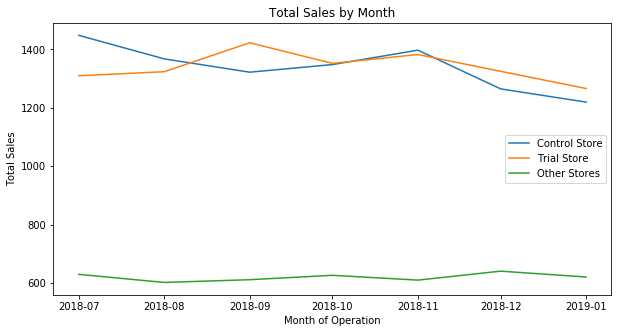

In [155]:
# Plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(combineSalesPlot)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

<h3>'Ncustomers' </h3>

In [156]:
# First create relevant dataframes 
controlCustomersPlot = Pastsales.loc[Pastsales['store_type'] == 'Control Store', ['TransactionMonth', 'Ncustomers']]
controlCustomersPlot.set_index('TransactionMonth', inplace = True)
controlCustomersPlot.rename(columns = {'Ncustomers': 'Control Store'}, inplace = True)
trialCustomersPlot = Pastsales.loc[Pastsales['store_type'] == 'Trial Store', ['TransactionMonth', 'Ncustomers']]
trialCustomersPlot.set_index('TransactionMonth', inplace = True)
trialCustomersPlot.rename(columns = {'Ncustomers': 'Trial Store'}, inplace = True)
otherCustomersPlot = Pastsales.loc[Pastsales['store_type'] == 'Other Stores', ['TransactionMonth', 'Ncustomers']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TransactionMonth').Ncustomers.mean())
otherCustomersPlot.rename(columns = {'Ncustomers': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot = pd.concat([controlCustomersPlot, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot

,Control Store,Trial Store,Other Stores
TransactionMonth,,,
2018-07-01,128,129,71.732558
2018-08-01,135,131,71.457364
2018-09-01,126,124,69.488372
2018-10-01,123,123,70.934109
2018-11-01,132,130,69.833333
2018-12-01,124,126,72.906977
2019-01-01,117,117,70.604651


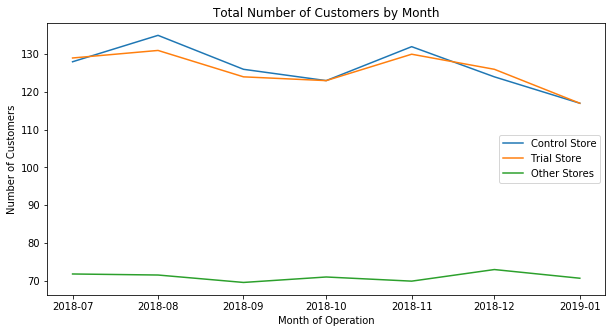

In [157]:
# Plot total number of customers for all 3 types of stores
plt.figure(figsize = (10, 5))
plt.plot(combineCustomersPlot)
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

# Assessment of trial for trial strore 88

 Scale pre-trial control store sales to match pre-trial trial store sales

In [158]:
trial_sum = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Trial Store' , 'Totsales'].sum()
control_sum = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Control Store', 'Totsales'].sum()
scalingFactorSales = trial_sum / control_sum
scalingFactorSales

1.0015583306649594

In [159]:
# Create a new dataframe 'scaledControlSales'
# Recall 'Measureovertime' dataframe
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [160]:
# Create dataframe and reset index
scaledControlSales = Measureovertime
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [161]:
# We only want control store i.e. store 237
scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01
2752,237,201812,1265.0,124,1.161290,2.006944,4.377163,2018-12-01
2753,237,201901,1219.7,117,1.188034,1.992806,4.403249,2019-01-01
2754,237,201902,1404.8,126,1.246032,2.000000,4.473885,2019-02-01
2755,237,201903,1208.2,119,1.126050,2.044776,4.409489,2019-03-01
2756,237,201904,1204.6,120,1.125000,2.014815,4.428676,2019-04-01


In [162]:
# Create 'controlSales' which applies 'scalingFactorSales' to 'Totsales' column
scaledControlSales['controlSales'] = scaledControlSales['Totsales'] * scalingFactorSales
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,1399.777923


In [163]:
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlSales[['YEARMONTH', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'totSales'
trialSales = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, 'Totsales']
trialSales.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'Totsales': 'trialSales'}, inplace = True)

percentageDiff

,YEARMONTH,controlSales,trialSales
0,201807,1450.657086,1310.00
1,201808,1369.931485,1323.80
2,201809,1324.260425,1423.00
3,201810,1350.401097,1352.40
4,201811,1399.777923,1382.80
5,201812,1266.971288,1325.20
6,201901,1221.600696,1266.40
7,201902,1406.989143,1370.20
8,201903,1210.082775,1477.20
9,201904,1206.477165,1439.40


In [164]:
# Calculate percentage difference and put it in a new column
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,1450.657086,1310.00,0.096961
1,201808,1369.931485,1323.80,0.033674
2,201809,1324.260425,1423.00,0.074562
3,201810,1350.401097,1352.40,0.001480
4,201811,1399.777923,1382.80,0.012129
5,201812,1266.971288,1325.20,0.045959
6,201901,1221.600696,1266.40,0.036673
7,201902,1406.989143,1370.20,0.026147
8,201903,1210.082775,1477.20,0.220743
9,201904,1206.477165,1439.40,0.193060


As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period 

In [165]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.03346786730307888

In [166]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7

In [167]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'tValue']

7    0.781270
8    6.595668
9    5.768527
Name: tValue, dtype: float64

In [168]:
# Find the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

In [169]:
# Recall our 'scaledControlSales' dataframe
scaledControlSales.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,1399.777923


In [170]:
# Add a new column 'TransactionMonth' to 'scaledControlSales'
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['YEARMONTH'].astype(str), format = '%Y%m')
scaledControlSales

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,1399.777923
2752,237,201812,1265.0,124,1.161290,2.006944,4.377163,2018-12-01,1266.971288
2753,237,201901,1219.7,117,1.188034,1.992806,4.403249,2019-01-01,1221.600696
2754,237,201902,1404.8,126,1.246032,2.000000,4.473885,2019-02-01,1406.989143
2755,237,201903,1208.2,119,1.126050,2.044776,4.409489,2019-03-01,1210.082775
2756,237,201904,1204.6,120,1.125000,2.014815,4.428676,2019-04-01,1206.477165


In [171]:
# Create the appropriate dataframe
# Extract 'controlSales' from 'scaledControlSales' dataframe for control store 
controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TransactionMonth,
2018-07-01,1450.657086
2018-08-01,1369.931485
2018-09-01,1324.260425
2018-10-01,1350.401097
2018-11-01,1399.777923
2018-12-01,1266.971288
2019-01-01,1221.600696
2019-02-01,1406.989143
2019-03-01,1210.082775


In [172]:
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [173]:
# Create a new column 'TransationMonth' under 'measureOverTime' dataframe
Measureovertime['TransactionMonth'] = pd.to_datetime(Measureovertime['YEARMONTH'].astype(str), format = '%Y%m')
Measureovertime.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [186]:
# Extract 'Totsales' for trial store from 'Measureovertime'
trialSales = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, ['TransactionMonth', 'Totsales']]
trialSales.set_index('TransactionMonth', inplace = True)
trialSales.rename(columns = {'Totsales': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,1310.00
2018-08-01,1323.80
2018-09-01,1423.00
2018-10-01,1352.40
2018-11-01,1382.80
2018-12-01,1325.20
2019-01-01,1266.40
2019-02-01,1370.20
2019-03-01,1477.20


In [187]:
# Create two new columns under 'controlSales' which calculates the 5% and 95% confidence interval
controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,1450.657086,1353.556288,1547.757884
2018-08-01,1369.931485,1278.234114,1461.628855
2018-09-01,1324.260425,1235.620080,1412.900769
2018-10-01,1350.401097,1260.011008,1440.791187
2018-11-01,1399.777923,1306.082759,1493.473086
2018-12-01,1266.971288,1182.165634,1351.776942
2019-01-01,1221.600696,1139.831956,1303.369436
2019-02-01,1406.989143,1312.811291,1501.166995
2019-03-01,1210.082775,1129.084996,1291.080555


In [188]:
# Merge the two dataframes together 'controlSales' and 'trialSales'
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TransactionMonth,,,,
2018-07-01,1450.657086,1353.556288,1547.757884,1310.00
2018-08-01,1369.931485,1278.234114,1461.628855,1323.80
2018-09-01,1324.260425,1235.620080,1412.900769,1423.00
2018-10-01,1350.401097,1260.011008,1440.791187,1352.40
2018-11-01,1399.777923,1306.082759,1493.473086,1382.80
2018-12-01,1266.971288,1182.165634,1351.776942,1325.20
2019-01-01,1221.600696,1139.831956,1303.369436,1266.40
2019-02-01,1406.989143,1312.811291,1501.166995,1370.20
2019-03-01,1210.082775,1129.084996,1291.080555,1477.20


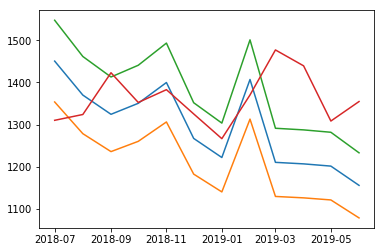

In [189]:
plt.plot(combineSales)

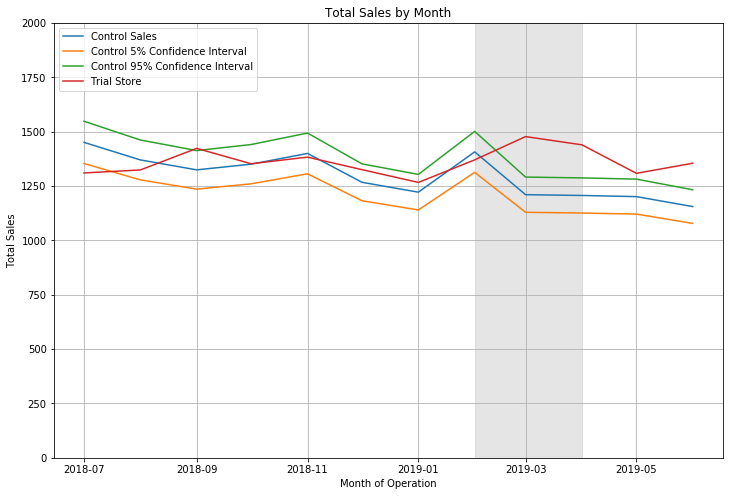

In [190]:
# Embellish the plot

# Change the size
plt.figure(figsize = (12, 8))
plt.plot(combineSales)

# Set graph title and axis title
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

# Set legend
plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

# Set new y-axis limit
plt.ylim((0, 2000))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

The results show that the trial in store 88 is significantly different to its
control store in the trial period as the trial store performance lies outside of
the 5% to 95% confidence interval of the control store in two of the three trial
months.

<h3>'Ncustomers'</h3>

In [191]:
# Compute scaling factor
# Let's call this variable 'scalingFactorCustomers'

trial_customers = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Trial Store' , 'Ncustomers'].sum()
control_customers = Pretrialmeasures.loc[Pretrialmeasures['store_type'] == 'Control Store', 'Ncustomers'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

0.9943502824858758

In [192]:
scaledControlCustomers = Measureovertime
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [193]:
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01


In [194]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Ncustomers'] * scalingFactorCustomers
scaledControlCustomers.head()

,STORE_NBR,YEARMONTH,Totsales,Ncustomers,NTXNpercust,NchipsperTXN,AvgpricePerunit,TransactionMonth,controlCustomers
2747,237,201807,1448.4,128,1.265625,2.000000,4.470370,2018-07-01,127.276836
2748,237,201808,1367.8,135,1.222222,1.896970,4.369968,2018-08-01,134.237288
2749,237,201809,1322.2,126,1.182540,2.006711,4.422074,2018-09-01,125.288136
2750,237,201810,1348.3,123,1.195122,2.034014,4.509365,2018-10-01,122.305085
2751,237,201811,1397.6,132,1.219697,1.987578,4.367500,2018-11-01,131.254237


In [199]:
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['YEARMONTH', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, 'Ncustomers']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'Ncustomers': 'trialCustomers'}, inplace = True)

percentageDiff

,YEARMONTH,controlCustomers,trialCustomers
0,201807,127.276836,129
1,201808,134.237288,131
2,201809,125.288136,124
3,201810,122.305085,123
4,201811,131.254237,130
5,201812,123.299435,126
6,201901,116.338983,117
7,201902,125.288136,124
8,201903,118.327684,134
9,201904,119.322034,128


In [201]:
# Calculate percentage difference and put it in a new column
percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff

,YEARMONTH,controlCustomers,trialCustomers,percentageDiff
0,201807,127.276836,129,0.013539
1,201808,134.237288,131,0.024116
2,201809,125.288136,124,0.010281
3,201810,122.305085,123,0.005682
4,201811,131.254237,130,0.009556
5,201812,123.299435,126,0.021902
6,201901,116.338983,117,0.005682
7,201902,125.288136,124,0.010281
8,201903,118.327684,134,0.132448
9,201904,119.322034,128,0.072727


 As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period 

In [202]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.00741024435207507

In [203]:
# Define the degrees of freedom
# Since we have 8 pre-trial months, dof = 8 - 1 = 7
dof = 7

In [204]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores
# Create a new column for 'tValue'
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'tValue']

7     1.387456
8    17.873693
9     9.814423
Name: tValue, dtype: float64

In [205]:
# Find the 95th percentile of the t distribution with dof = 7
t.isf(0.05, dof)

1.8945786050613054

We can see that the t-value is larger than the 95th percentile value of the t-distribution

In [206]:
# Create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'controlCustomers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TransactionMonth,
2018-07-01,127.276836
2018-08-01,134.237288
2018-09-01,125.288136
2018-10-01,122.305085
2018-11-01,131.254237
2018-12-01,123.299435
2019-01-01,116.338983
2019-02-01,125.288136
2019-03-01,118.327684


In [207]:
# Extract 'Ncustomers' for trial store from 'Measureovertime'
trialCustomers = Measureovertime.loc[Measureovertime['STORE_NBR'] == trial_store, ['TransactionMonth', 'Ncustomers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'Ncustomers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,129
2018-08-01,131
2018-09-01,124
2018-10-01,123
2018-11-01,130
2018-12-01,126
2019-01-01,117
2019-02-01,124
2019-03-01,134


In [208]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval
controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,127.276836,125.390531,129.163141
2018-08-01,134.237288,132.247826,136.226750
2018-09-01,125.288136,123.431304,127.144967
2018-10-01,122.305085,120.492464,124.117706
2018-11-01,131.254237,129.308985,133.199489
2018-12-01,123.299435,121.472077,125.126793
2019-01-01,116.338983,114.614782,118.063184
2019-02-01,125.288136,123.431304,127.144967
2019-03-01,118.327684,116.574010,120.081358


In [209]:
# Merge the two dataframes together 'controlSales' and 'trialSales'
combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
TransactionMonth,,,,
2018-07-01,127.276836,125.390531,129.163141,129
2018-08-01,134.237288,132.247826,136.226750,131
2018-09-01,125.288136,123.431304,127.144967,124
2018-10-01,122.305085,120.492464,124.117706,123
2018-11-01,131.254237,129.308985,133.199489,130
2018-12-01,123.299435,121.472077,125.126793,126
2019-01-01,116.338983,114.614782,118.063184,117
2019-02-01,125.288136,123.431304,127.144967,124
2019-03-01,118.327684,116.574010,120.081358,134


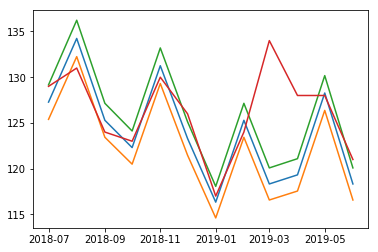

In [210]:
plt.plot(combineCustomers)

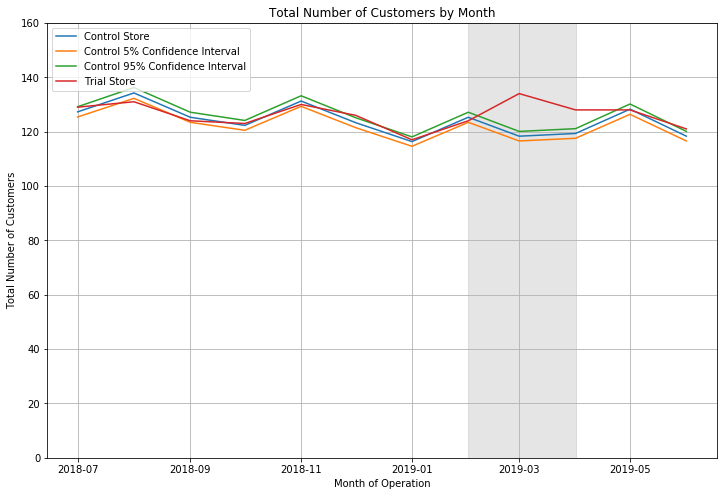

In [211]:
# Embellish the plot

# Change the size
plt.figure(figsize = (12, 8))
plt.plot(combineCustomers)

# Set graph title and axis title
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')

# Set legend
plt.legend(['Control Store', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)

# Set new y-axis limit
plt.ylim((0, 160))

# Highlight trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)

# Set grid
plt.grid()
plt.show()

Total number of customers in the trial period for the trial store is significantly
higher than the control store for two out of three months, which indicates a
positive trial effect.

# Conclusion

We've found control stores 233, 155, 237 for trial stores 77, 86 and 88
respectively.
The results for trial stores 77 and 88 during the trial period show a significant
difference in at least two of the three trial months but this is not the case for
trial store 86. We can check with the client if the implementation of the trial was
different in trial store 86 but overall, the trial shows a significant increase in
sales.